In [1]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy.stats import kde
from scipy.interpolate import interpolate
import pandas as pd
from matplotlib.ticker import ScalarFormatter
import numpy as np

In [2]:
### perferred plot parameters 
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['xtick.minor.size'] = 4
mpl.rcParams['ytick.minor.size'] = 4
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['lines.markeredgewidth'] = 1

mpl.rcParams['axes.labelweight']='semibold'
mpl.rcParams['axes.titleweight']='semibold'
mpl.rcParams['font.weight'] = 'semibold'
mpl.rcParams['axes.linewidth']    = 1.5
mpl.rcParams.update({'font.size': 15})

#### Upload text file for young planet

In [3]:
young_df  = pd.read_csv("young_pl_ALL.txt", delimiter=' & ')

/var/folders/0q/p4560zbx7592y4vskv3wt9_00000gn/T/ipykernel_21022/1743274625.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  young_df  = pd.read_csv("young_pl_ALL.txt", delimiter=' & ')


#### Upload text file for Kepler (+old) planets

In [5]:
name,association,age_str,period,p_rad,p_rad_err,\
	sma,sam_err,s_flux,s_flux_err,m_star,m_star_err,\
		Rstar,Rstar_err,Teff,Teff_err = np.loadtxt('old_pl.txt',unpack=True,delimiter=',',
		                                           dtype='U100,U100,U100,f,f,f,f,f,f,f,f,f,f,f,f,f',
		                                           usecols=(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15))
ymax = 1.25
age_mask = (association != '')
age = np.zeros(age_str.size)*np.nan
age[age_mask] = age_str[age_mask].astype(np.float)

/var/folders/0q/p4560zbx7592y4vskv3wt9_00000gn/T/ipykernel_21022/1006600291.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  age[age_mask] = age_str[age_mask].astype(np.float)


In [6]:
cmap = 'viridis_r'
vmin  = 0 
vmax= 700 

'''
possible cmap colors:


 RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, 
 Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu,
 YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, 
 autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, 
 cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, 
 cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, 
 gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, 
 gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, 
 gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, 
 inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, 
 ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, 
 seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, 
 tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, 
 viridis_r, winter, winter_r
'''

'\npossible cmap colors:\n\n\n RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, \n Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu,\n YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, \n autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, \n cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, \n cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, \n gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, \n gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, \n gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, \n inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, \n ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, \n seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, \n tab20_r, tab20b, tab20b_r, ta

##### Get the minor ticks for the plot since it's in logspace 

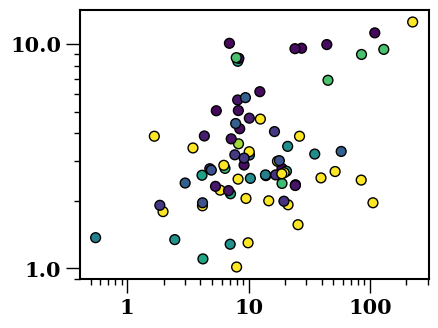

In [7]:
fig,ax = plt.subplots(1,figsize=(4.5,3.5))
plt.scatter(young_df['pl_orbper'],young_df['pl_rade'],c=young_df['st_age_myr'],cmap='viridis',s=50,zorder=3,vmin=vmin,vmax=vmax,marker='o', edgecolor='k')
ax.set_yscale('log', base=10)
ax.set_xscale('log', base=10)

ax.xaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_major_formatter(ScalarFormatter())

### these lines of codes get the minor ticks! 
xx = ax.xaxis.get_minorticklabels()
yy = ax.yaxis.get_minorticklabels()

xxx = [str(i).split(",")[0][5:] for i in xx]
yyy = [str(i).split(",")[1][1:] for i in yy]
xxxx = [float(i) for i in xxx]
yyyy = [float(i) for i in yyy]

#### Plot ALL young planets 

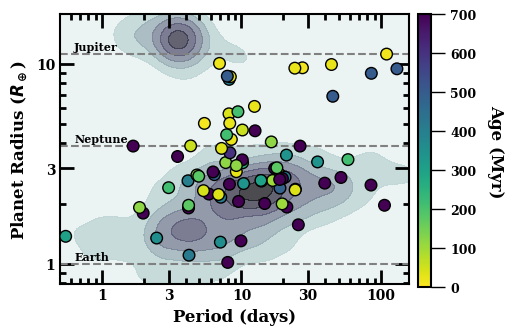

In [14]:
##################################################################
######    Radius versus Period #####
##################################################################
nbins=100
xp = np.log10(period[~age_mask])
yp = np.log10(p_rad[~age_mask])
kp = kde.gaussian_kde([xp,yp],bw_method=0.15)
xip, yip = np.mgrid[np.log10(0.5):np.log10(350):nbins*1j, np.log10(0.6):np.log10(22):nbins*1j]
zi_p = kp(np.vstack([xip.flatten(), yip.flatten()]))

fig,ax = plt.subplots(1,figsize=(4.5,3.5))
ax = plt.gca()
ax.yaxis.set_ticks_position('both') # ticks appear on both side 
ax.xaxis.set_ticks_position('both') # ticks appear on both side 
ax.tick_params(which='both', direction="in", width=2) # moves the major and minor ticks inside the plot 

ax.set_xlabel(r'Period (days)',fontsize=12)
ax.set_ylabel(r'Planet Radius ($R_\oplus$)',fontsize=12)

# Plot the contour 
ax.contourf(xip, yip, zi_p.reshape(xip.shape),7,zorder=1,cmap='bone_r', alpha = 0.75)

### Plot the lines 
ax.axhline(np.log10(1.0),ls='--',color='grey')
ax.text(-0.20,np.log10(1.0)+0.02,'Earth',fontsize=8)
ax.axhline(np.log10(3.883),ls='--',color='grey')
ax.text(-0.20,np.log10(3.883)+0.02,'Neptune',fontsize=8)
ax.axhline(np.log10(11.209),ls='--',color='grey')
ax.text(-0.20,np.log10(11.209)+0.02,'Jupiter',fontsize=8)


# Plot the planets
cb = ax.scatter(np.log10(young_df['pl_orbper']),np.log10(young_df['pl_rade']),c=young_df['st_age_myr'],cmap=cmap,
                s=70,zorder=3, vmin=vmin, vmax= vmax, marker='o', edgecolor='k')

####################################### ADD MORE LINES FOR EACH TARGET
### making a black outline for the star
#cb = ax.scatter(np.log10(t1_period),np.log10(t1_prad),
#	c='k', s=500,zorder=3,vmin=0,vmax=700,marker='*')
# plotting the target as a star instead of a circle
#cb = ax.scatter(np.log10(t1_period),np.log10(t1_prad), 
#	c=t1_age, cmap = cmap, s=250,zorder=3,vmin=0,vmax=700,marker='*')


##### set the major ticks! 
ax.set_xticks(np.log10(np.array([1,3,10,30,100])))
ax.set_xticklabels(['1','3','10','30','100'],fontsize=10)

ax.set_yticks(np.log10(np.array([1, 3, 10])))
ax.set_yticklabels(['1', '3', '10'],fontsize=10)

##### set the minor ticks! 
#### manuaelly adding in the minor ticks!!!
minorticks = np.log10(np.array(xxxx))
ax.set_xticks( minorticks, minor=True)

#### manuaelly adding in the minor ticks!!!
minorticks = np.log10(np.array(yyyy))
ax.set_yticks( minorticks, minor=True)

cb_ax = fig.add_axes([0.92, 0.1, 0.03, 0.78])

cbar = plt.colorbar(cb,cax=cb_ax)
cbar.set_label('Age (Myr)',rotation=270,labelpad=20,fontsize=12)
cbar.ax.tick_params(labelsize=9)

ax.set_xlim(-0.3,2.2)
ax.set_ylim(-0.1,ymax)

plt.savefig('Radius_v_Period_ALL.png',dpi=600,bbox_inches='tight', transparent=True)

#mplcursors.cursor(hover=True)
plt.show()


### Plot planets of only young association 

In [9]:
association_df = young_df[young_df['Association'] !='Young Field']

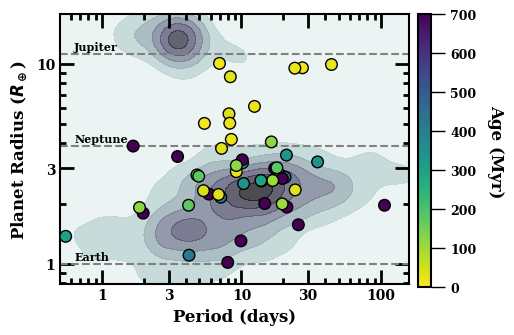

In [15]:
##################################################################
######    Radius versus Period #####
##################################################################
nbins=100
xp = np.log10(period[~age_mask])
yp = np.log10(p_rad[~age_mask])
kp = kde.gaussian_kde([xp,yp],bw_method=0.15)
xip, yip = np.mgrid[np.log10(0.5):np.log10(350):nbins*1j, np.log10(0.6):np.log10(22):nbins*1j]
zi_p = kp(np.vstack([xip.flatten(), yip.flatten()]))

fig,ax = plt.subplots(1,figsize=(4.5,3.5))
ax = plt.gca()
ax.yaxis.set_ticks_position('both') # ticks appear on both side 
ax.xaxis.set_ticks_position('both') # ticks appear on both side 
ax.tick_params(which='both', direction="in", width=2) # moves the major and minor ticks inside the plot 

ax.set_xlabel(r'Period (days)',fontsize=12)
ax.set_ylabel(r'Planet Radius ($R_\oplus$)',fontsize=12)

ax.contourf(xip, yip, zi_p.reshape(xip.shape),7,zorder=1,cmap='bone_r', alpha = 0.75)

ax.axhline(np.log10(1.0),ls='--',color='grey')
ax.text(-0.20,np.log10(1.0)+0.02,'Earth',fontsize=8)
ax.axhline(np.log10(3.883),ls='--',color='grey')
ax.text(-0.20,np.log10(3.883)+0.02,'Neptune',fontsize=8)
ax.axhline(np.log10(11.209),ls='--',color='grey')
ax.text(-0.20,np.log10(11.209)+0.02,'Jupiter',fontsize=8)

# Plot the planets
cb = ax.scatter(np.log10(association_df['pl_orbper']),np.log10(association_df['pl_rade']),c=association_df['st_age_myr'],cmap=cmap,
                s=70,zorder=3, vmin=vmin, vmax= vmax, marker='o', edgecolor='k')

##### set the major ticks! 
ax.set_xticks(np.log10(np.array([1,3,10,30,100])))
ax.set_xticklabels(['1','3','10','30','100'],fontsize=10)

ax.set_yticks(np.log10(np.array([1, 3, 10])))
ax.set_yticklabels(['1', '3', '10'],fontsize=10)

##### set the minor ticks! 
#### manuaelly adding in the minor ticks!!! :) 
minorticks = np.log10(np.array(xxxx))
ax.set_xticks( minorticks, minor=True)

#### manuaelly adding in the minor ticks!!! :) 
minorticks = np.log10(np.array(yyyy))
ax.set_yticks( minorticks, minor=True)

cb_ax = fig.add_axes([0.92, 0.1, 0.03, 0.78])
cbar = plt.colorbar(cb,cax=cb_ax)
cbar.set_label('Age (Myr)',rotation=270,labelpad=20,fontsize=12)
cbar.ax.tick_params(labelsize=9)

ax.set_xlim(-0.3,2.2)
ax.set_ylim(-0.1,ymax)


plt.savefig('Radius_v_Period_association.png',dpi=600,bbox_inches='tight', transparent=True)

#mplcursors.cursor(hover=True)

plt.show()
